In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <font color=red>Classification - kNN</font>

In [213]:
from sklearn import  datasets
breast_cancer_data = datasets.load_breast_cancer()
print(breast_cancer_data['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

###  We can see from the information above that all the attributes(features) in the dataset are numeric except for class(Benign=0,Malignant=1). So we'll use all these features in our classification which will predict  whether a tumor is benign or malignant.

In [214]:
bc_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names) #bc_df=breast cancer dataframe 
bc_df['class'] = breast_cancer_data.target
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


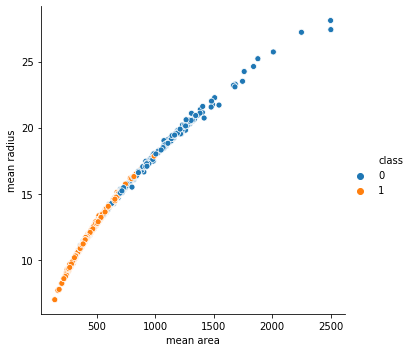

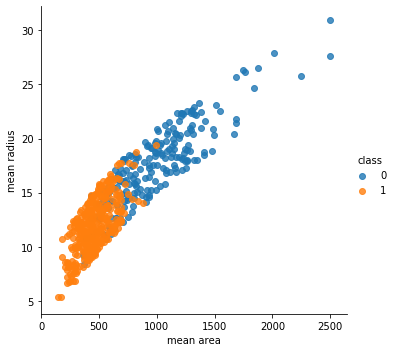

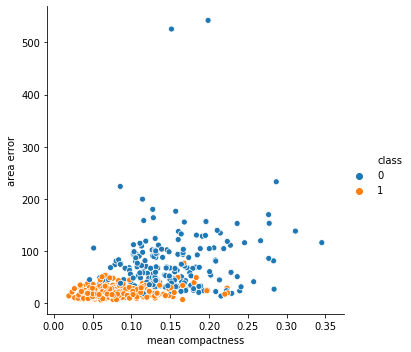

In [215]:
ax = sns.relplot(kind='scatter', x='mean area', y='mean radius', hue='class', data=bc_df)
sns.lmplot(x='mean area', y='mean radius', hue='class', data=bc_df,x_jitter=0, y_jitter=3, fit_reg=False)
ax = sns.relplot(kind='scatter', x='mean compactness', y='area error', hue='class', data=bc_df)

### The few visuals above show that the features can help with our calssification.

In [216]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### The data above shows that the features need scalling.(With a range from 0 to 1)

### Below we'll scale the features.

In [217]:
#we need to scale the features to be all on the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bc_df['mean radius'] = scaler.fit_transform(bc_df[['mean radius']])
bc_df['mean texture'] = scaler.fit_transform(bc_df[['mean texture']])
bc_df['mean perimeter'] = scaler.fit_transform(bc_df[['mean perimeter']])
bc_df['mean area'] = scaler.fit_transform(bc_df[['mean area']])
bc_df['mean smoothness'] = scaler.fit_transform(bc_df[['mean smoothness']])
bc_df['mean compactness'] = scaler.fit_transform(bc_df[['mean compactness']])
bc_df['mean concavity'] = scaler.fit_transform(bc_df[['mean concavity']])
bc_df['mean concave points'] = scaler.fit_transform(bc_df[['mean concave points']])
bc_df['mean symmetry'] = scaler.fit_transform(bc_df[['mean symmetry']])
bc_df['mean fractal dimension'] = scaler.fit_transform(bc_df[['mean fractal dimension']])
bc_df['radius error'] = scaler.fit_transform(bc_df[['radius error']])
bc_df['texture error'] = scaler.fit_transform(bc_df[['texture error']])
bc_df['perimeter error'] = scaler.fit_transform(bc_df[['perimeter error']])
bc_df['area error'] = scaler.fit_transform(bc_df[['area error']])
bc_df['smoothness error'] = scaler.fit_transform(bc_df[['smoothness error']])
bc_df['compactness error'] = scaler.fit_transform(bc_df[['compactness error']])
bc_df['concavity error'] = scaler.fit_transform(bc_df[['concavity error']])
bc_df['concave points error'] = scaler.fit_transform(bc_df[['concave points error']])
bc_df['symmetry error'] = scaler.fit_transform(bc_df[['symmetry error']])
bc_df['fractal dimension error'] = scaler.fit_transform(bc_df[['fractal dimension error']])
bc_df['worst radius'] = scaler.fit_transform(bc_df[['worst radius']])
bc_df['worst texture'] = scaler.fit_transform(bc_df[['worst texture']])
bc_df['worst perimeter'] = scaler.fit_transform(bc_df[['worst perimeter']])
bc_df['worst area'] = scaler.fit_transform(bc_df[['worst area']])
bc_df['worst smoothness'] = scaler.fit_transform(bc_df[['worst smoothness']])
bc_df['worst compactness'] = scaler.fit_transform(bc_df[['worst compactness']])
bc_df['worst concavity'] = scaler.fit_transform(bc_df[['worst concavity']])
bc_df['worst concave points'] = scaler.fit_transform(bc_df[['worst concave points']])
bc_df['worst symmetry'] = scaler.fit_transform(bc_df[['worst symmetry']])
bc_df['worst fractal dimension'] = scaler.fit_transform(bc_df[['worst fractal dimension']])
display(bc_df)
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### We can now see that all the features are scaled with a range from 0 to 1.

# Task 1 & 2:

In [218]:
# It is always sensible to randomly shuffle the dataframe first
bc_df = bc_df.sample(frac=1)


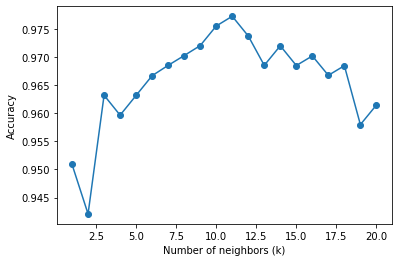

In [219]:
# Finally, we can run a kNN CV loop
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Split to X and Y
X = bc_df.loc[:, bc_df.columns != 'class'].values # features
Y = bc_df.loc[:, 'class'].values # labels

# Split to train size=500 and test size=69
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=69/569)

# Run 5-fold CV to find optimal k
mean_cv_scores = []
k_list = range(1, 21)
for nn in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=nn)
    cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
    mean_cv_scores.append(cv_scores.mean())
    
# output results
best_k = mean_cv_scores.index(max(mean_cv_scores))+1
plt.plot(k_list, mean_cv_scores, '-o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy');


# Task 3:

In [220]:
print('Highest accuracy is obtained for k =', best_k, 'and equals', max(mean_cv_scores))

Highest accuracy is obtained for k = 11 and equals 0.9772066179299731


# Task 4:

In [221]:
# Last, we need to retrain our chosen kNN on the whole training data and test its accuracy on the test data
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)  
knn_classifier.fit(X_train, Y_train)
print('Accuracy of the classifier is', knn_classifier.score(X_test, Y_test))

Accuracy of the classifier is 0.9420289855072463


# <font color=red>Clustering - K-Means</font>

In [222]:
df = pd.read_csv('kmeans_data.csv')
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Maor,29,61000
3,Ido,28,60000
4,Kory,42,150000
5,Gabriel,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angie,35,130000


### Let's visualize the data:

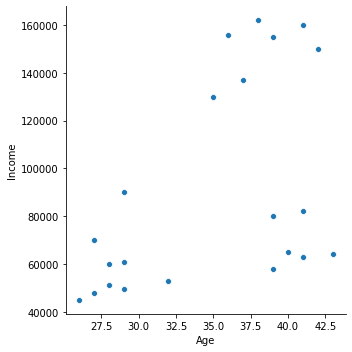

In [223]:
sns.relplot(kind='scatter', x='Age', y='Income', data=df)

# Task 1:

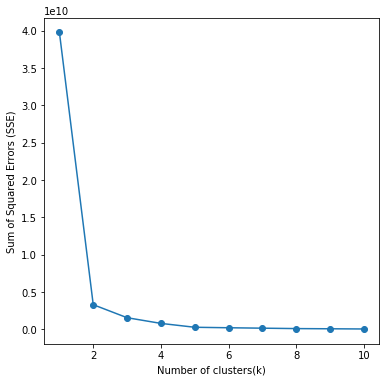

In [224]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

sse = []
k_list = list(range(1, 11))
for k in k_list:
    km = KMeans(n_clusters=k) # Initialize K-Means model with k centroids
    km.fit(df[['Age','Income']]) # Run algorithm and create clusters
    sse.append(km.inertia_) #calculating SSE and adding the result to the SSE array
    
plt.figure(figsize=(6,6))
plt.plot(k_list, sse, '-o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of Squared Errors (SSE)');

### The optimal K based on the elbow method is K=2.

# Task 2:

In [225]:
km = KMeans(n_clusters=2)
points_predicted = km.fit_predict(df[['Age','Income']])
points_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [226]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.32000000e+01, 6.26333333e+04]])

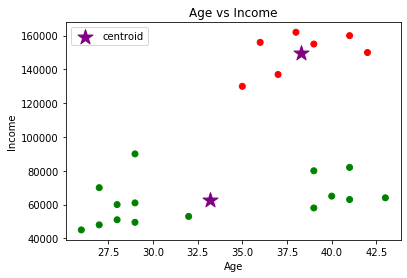

In [227]:
%matplotlib inline

colors = np.array(['red', 'green']) # create color map, color for each iris type

plt.scatter(df['Age'], df['Income'], c= colors[points_predicted])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*',s=250, label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.legend()

# Task 3:

### No, the problem is that the features need scaling because the difference between their scales is big and this causes clustering problems.
### This problem can be solved by scaling the features before we use the Elbow method(calculate SSE).

In [229]:
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income'] = scaler.fit_transform(df[['Income']])

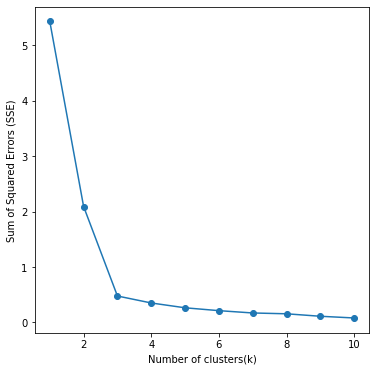

In [230]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

sse = []
k_list = list(range(1, 11))
for k in k_list:
    km = KMeans(n_clusters=k) # Initialize K-Means model with k centroids
    km.fit(df[['Age','Income']]) # Run algorithm and create clusters
    sse.append(km.inertia_) #calculating SSE and adding the result to the SSE array
    
plt.figure(figsize=(6,6))
plt.plot(k_list, sse, '-o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of Squared Errors (SSE)');

### The optimal K based on the elbow method is K=3.

### Now let's use K-Means with k=3:

In [231]:
km = KMeans(n_clusters=3)
points_predicted = km.fit_predict(df[['Age','Income']])
points_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [232]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

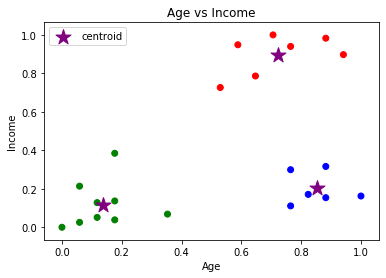

In [233]:
%matplotlib inline

colors = np.array(['red', 'green','blue']) # create color map, color for each iris type

plt.scatter(df['Age'], df['Income'], c= colors[points_predicted])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*',s=250, label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.legend()